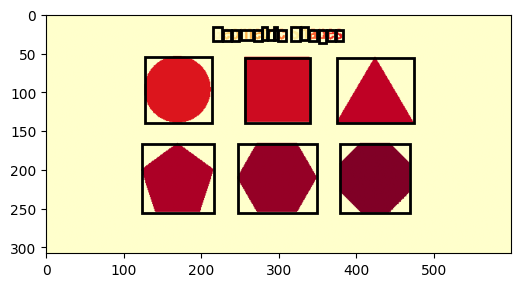

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)

# performing Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than threshold are kept
b = a > thres

# labelling is performed on b
c = label(b)

# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)

# the following command creates an empty plot of dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr

    # Rectangular boxes with origin at (lr, lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

# Thêm dòng này để lưu ảnh kết quả
plt.savefig('label_output.jpg', bbox_inches='tight', pad_inches=0) # Lưu ảnh trước khi hiển thị

plt.show()

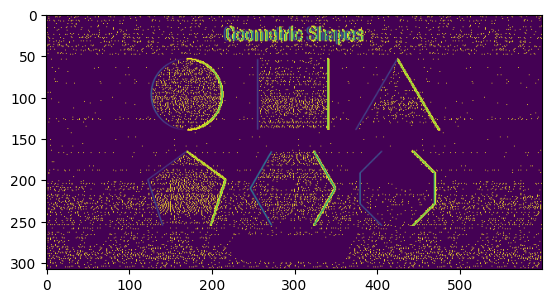

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

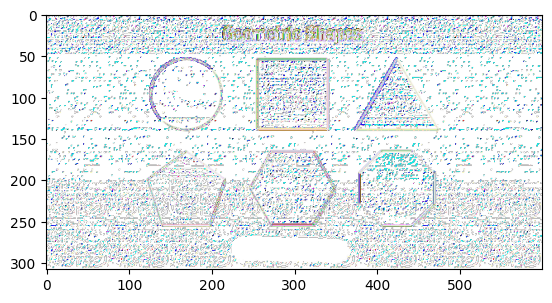

In [6]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

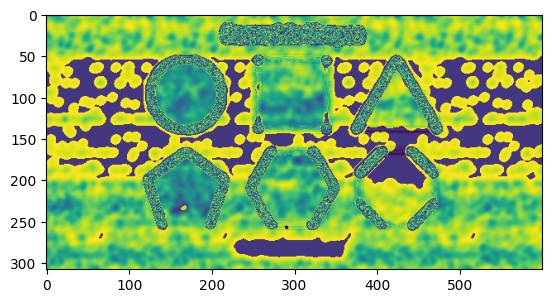

In [7]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

# Hàm Harris Corner Detection
def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)  # Gradient theo trục x
    y = nd.sobel(indata, 1)  # Gradient theo trục y

    xl = x ** 2
    yl = y ** 2
    xy = abs(x * y)

    # Làm mượt bằng Gaussian filter
    xl = nd.gaussian_filter(xl, 3)
    yl = nd.gaussian_filter(yl, 3)
    xy = nd.gaussian_filter(xy, 3)

    # Tính determinant và trace
    detC = xl * yl - 2 * xy
    trC = xl + yl

    # Ma trận phản ứng Harris
    R = detC - alpha * trC**2
    return R

# Đọc ảnh và chuyển sang grayscale nếu cần
data = Image.open('geometric.png').convert('L')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

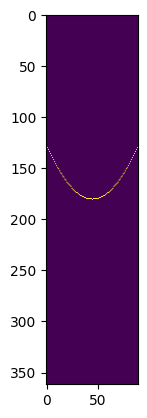

In [8]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))   # Bán kính không gian Hough
    ho = np.zeros((R, 90), float)     # Không gian Hough
    
    w = data + 0
    ok = 1

    theta = np.arange(90) / 180.0 * np.pi
    tp = np.arange(90).astype(float)

    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v, h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)

            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx

            w[v, h] = 0

    return ho

# Tạo ảnh test: ảnh nền đen với 1 điểm trắng ở giữa
data = np.zeros((256, 256))
data[128, 128] = 1

bmg = LineHough(data, 0.5)

# Hiển thị kết quả Hough
plt.imshow(bmg)
plt.show()

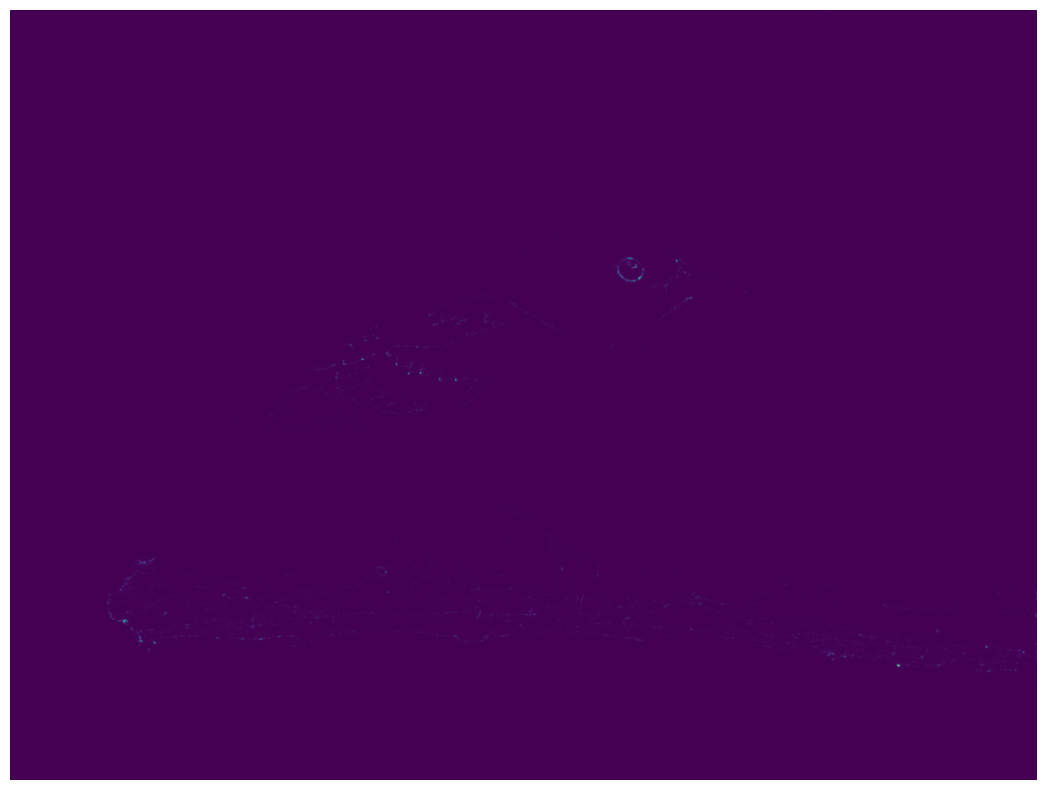

In [9]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k=0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()